In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
res_linux = [14405692, 14081966, 13955332, 14067852, 14135586, 14036106, \
             14290898, 14179994, 13942806, 14094688]
res_kvm_catch = [61172602, 62802182, 167445942, 161251990, 167225052, \
                 156427462, 170259560, 175406026, 97091170, 63631592]
res_uhyve_catch = [49010934, 48194500, 48555946, 48765228, 47947304, \
                   48476300, 49024454, 49050998, 49986266, 51898732]
res_kvm_call = [226152, 226164, 226198, 226174, 467146, 225978, 226174, \
                226158, 225984, 226158]
res_uhyve_call = [45154, 45274, 46320, 45266, 45202, 45166, 46378, 98784, \
                   45276, 45290]

In [5]:
linux_mean = np.mean(res_linux)
kvm_catch_mean = np.mean(res_kvm_catch)
uhyve_catch_mean = np.mean(res_uhyve_catch)
kvm_call_mean = np.mean(res_kvm_call)
uhyve_call_mean = np.mean(res_uhyve_call)

linux_std = np.std(res_linux)
kvm_catch_std = np.std(res_kvm_catch)
uhyve_catch_std = np.std(res_uhyve_catch)
kvm_call_std = np.std(res_kvm_call)
uhyve_call_std = np.std(res_uhyve_call)

means = [linux_mean, kvm_catch_mean, uhyve_catch_mean, kvm_call_mean, \
         uhyve_call_mean]
stdevs = [linux_std, kvm_catch_std, uhyve_catch_std, kvm_call_std, \
          uhyve_call_std]

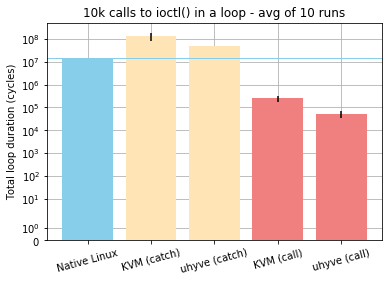

In [6]:
N = 5
ind = np.arange(N)

fig, ax = plt.subplots()
ax.grid()
ax.set_axisbelow(True)
plt.yscale('symlog')
plt.title("10k calls to ioctl() in a loop - avg of 10 runs")
#ax.set_xticklabels(["NULL", "Native Linux", "KVM (catch)", \
#                   "uhyve (catch)", "KVM (call)", "uhyve (call)"])
plt.xticks(ind, ["Native Linux", "KVM (catch)", "uhyve (catch)", \
    "KVM (call)", "uhyve (call)"], rotation=15)
ax.set_ylabel('Total loop duration (cycles)')

plt.axhline(linux_mean, color="skyblue", lw=1)

rects1 = ax.bar(ind, means, yerr=stdevs, color=["skyblue", "moccasin", \
    "moccasin", "lightcoral", "lightcoral"])

plt.savefig("ioctl.pdf")
